# CS 4501 Algorithmic Economics - Project 2

In this project, our team explores a reinforcement learning approach to economic game theory. In task I, we explore playing a pennies game and rock-paper-scissors with full information. Full information means that both players in a game have knowledge about the opponent's strategy (<em>i<sub>t</sub></em>, <em>j<sub>t</sub></em>) at any time <em>t</em>. Furthermore, knowing the strategy, both players know their own utility as portrayed in the payoff matrix.

### Task I: Uncoupled No-Regret Learning Dynamics under Full Information

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

#### Question (a) - Pennies game

Here, we create a multiplicative weight update (MWU) algorithm. The MWU algorithm follows the logic that past performance should guide the choices made now. Within the algorithm, we must define the following variables:
<ul>
<li><em>k</em>: number of strategies</li>
<li><em>T</em>: number of iterations
<li><em>w</em>: weights that determine the power of a strategy</li>
<li><em>M</em>: payoff matrix</li>
<li><em>cost</em>: the disutility from opponent winning the game</li>
</ul>
<newline>
The MWU algorithm uses the payoff matrix and a probability distribution to run a cost iterations that update the weights to select the best strategy for that player, given knowledge about the opponent. 

In [7]:
# An example template of the Multiplicative Weight Update Algorithm. You DO NOT have to use this template

# ------- Multiplicative Weight Update Algorithm -------#
def MWU(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (you may use any data struct):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 

    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):

        # Compute epsilon
        epsilon = compute_epsilon(t)
        
        # ---------- Fill out the details --------------# 
        # Simple matrix operations can be used here

        #sum of weights
        sum_w_a = np.sum(w_a)
        sum_w_b = np.sum(w_b)

        #probability
        p_a = w_a/sum_w_a #normalizing
        p_b = w_b/sum_w_b

        #adding probabilities
        sum_p_a += p_a[0]
        sum_p_b += p_b[0]
        
        # cost vector
        cost_a = np.matmul(M_a, p_b)
        cost_b = np.matmul(M_b.T, p_a)

        #updating weights
        w_a = np.multiply(w_a, np.ones(k) - epsilon*cost_a)
        w_b = np.multiply(w_b, np.ones(k) - epsilon*cost_b)
        
        # avg convergence
        avg_conv_a[t] = sum_p_a/(t+1)
        avg_conv_b[t] = sum_p_b/(t+1)

        # last convergence
        last_conv_a[t] = p_a[0]
        last_conv_b[t] = p_b[0]
        
    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

Here, we have defined the payoff matrix for both player A and player B. Below is a more intuitive representation of what we have written in code.

<picture><img src="PayoffMatrixPennies.png"></picture>

In the payoff matrix, we observe that pennies is a zero-sum game. Whenever player A gains, player B loses the same amount. Because we are assigning probabilities to each pure strategy (heads or tails), we can attain mixed strategy Nash equillibria in these games.

In [8]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

Below, we observe average convergence and last-iteration convergence for our MWU algorithm. Convergence helps us find a stable point after a sequence of solutions found in each iteration of the MWU algorithm.

<strong>Average convergence</strong> sums all the probabilities assigned to each strategy and averages it over the total iterations

<strong>Last-iteration convergence</strong> picks the last probability assignment on the <em>T</em>th iteration

In [9]:
def avg_conv(avg_conv_a, avg_conv_b):
    x = list(range(0, 3000))
    plt.plot(avg_conv_a, avg_conv_b)
    plt.xlabel("Player A")
    plt.ylabel("Player B")
    plt.title("Avg game convergence")

In [10]:
def last_conv(last_conv_a, last_conv_b):
    x = list(range(0, 3000))
    plt.plot(last_conv_a, last_conv_b)
    plt.xlabel("Player A")
    plt.ylabel("Player B")
    plt.title("Last game convergence")

**Choice 1: epsilon = 1/2**

[ 0.89201604 -0.89201604]


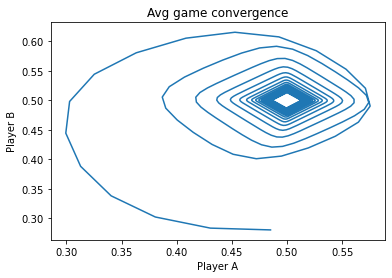

In [11]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

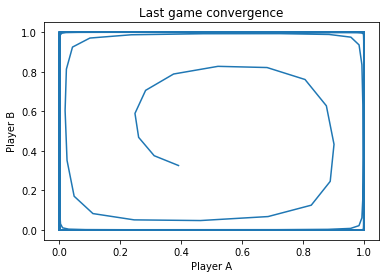

In [7]:
last_conv(last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

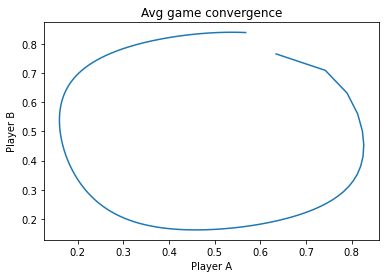

In [8]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

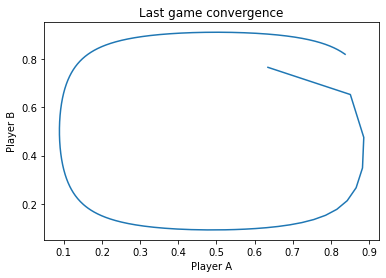

In [9]:
last_conv(last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

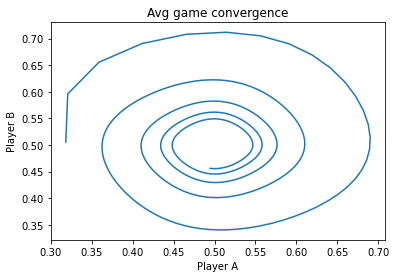

In [10]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

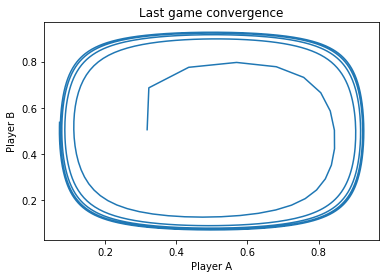

In [11]:
last_conv(last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

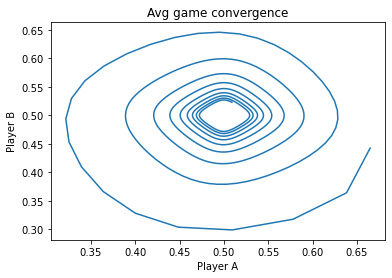

In [12]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

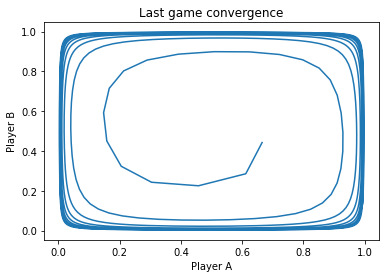

In [13]:
last_conv(last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

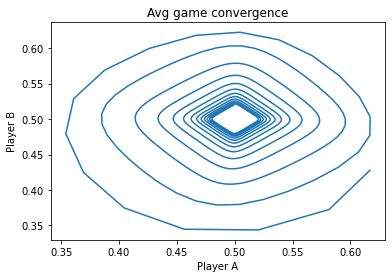

In [14]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

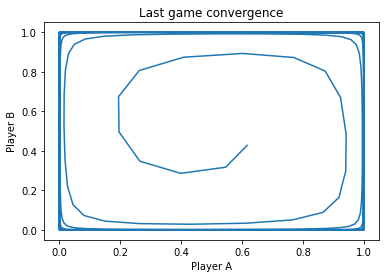

In [15]:
last_conv(last_conv_a, last_conv_b)

#### Question (b) - Rock-paper-scissors game

In [16]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

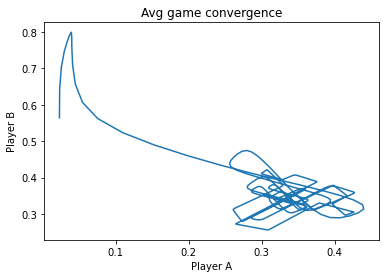

In [17]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

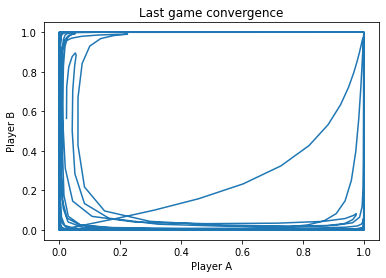

In [18]:
last_conv(last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

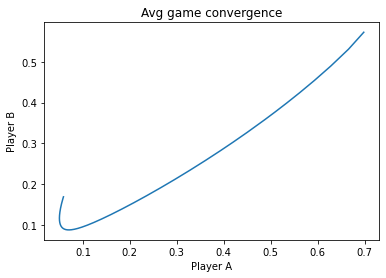

In [19]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

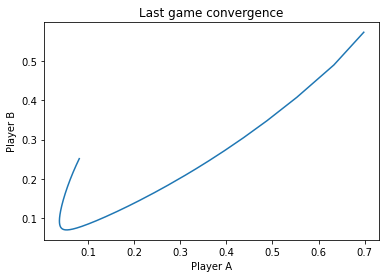

In [20]:
last_conv(last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

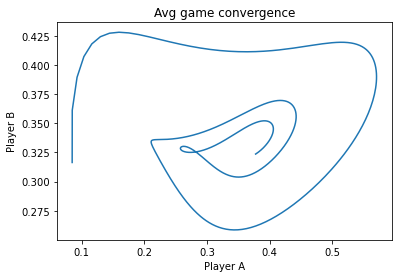

In [21]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

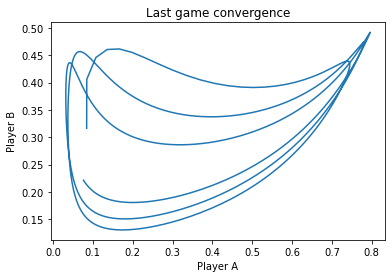

In [22]:
last_conv(last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

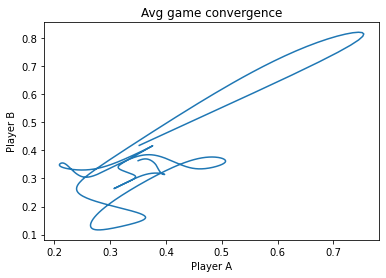

In [23]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

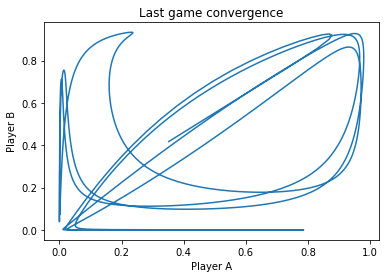

In [24]:
last_conv(last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

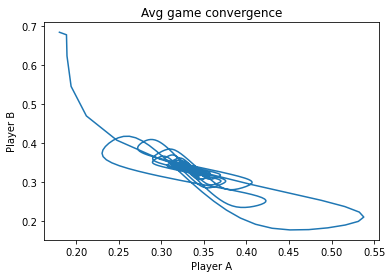

In [25]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

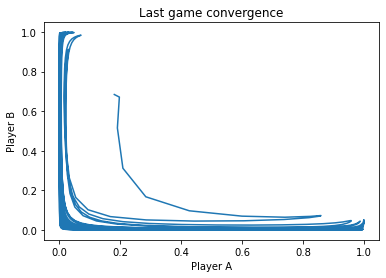

In [26]:
last_conv(last_conv_a, last_conv_b)

#### Question (c)

In [28]:
# A function template to construct payoff matrices for the DIR game
# You DO NOT have to use this template
def construct_DIR(K, c):
    rho = max(K, c)
    M_a = np.zeros((K, K))
    M_b = np.zeros((K, K))
    
    for i in range(K):
        for j in range(K):
            if i <= (j+1):
                # something happens here
                M_a[i,j] = i/rho
            else:
                # something happens here
                M_a[i,j] = -c/rho
            if j <= i:
                # something happens here
                M_b[i,j] = j/rho
            else:
                # something happens here
                M_b[i,j] = -c/rho
    return M_a, M_b

**Choice 1: epsilon = 1/2**

/var/folders/vq/zpn0t5p145b17mbw4wgpvjnw0000gn/T/ipykernel_28932/686268958.py:63: RuntimeWarning: overflow encountered in multiply
  w_b = np.multiply(w_b, np.ones(k) - epsilon*cost_b)
/var/folders/vq/zpn0t5p145b17mbw4wgpvjnw0000gn/T/ipykernel_28932/686268958.py:51: RuntimeWarning: invalid value encountered in true_divide
  p_b = w_b/sum_w_b


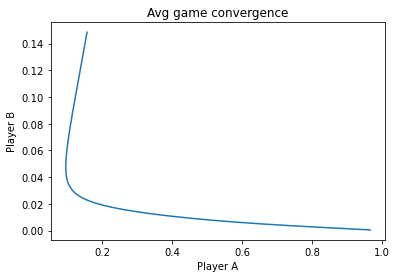

In [31]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

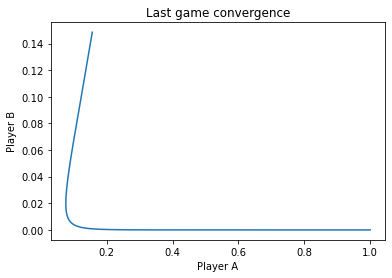

In [32]:
last_conv(last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

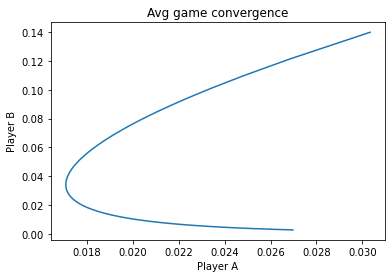

In [33]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

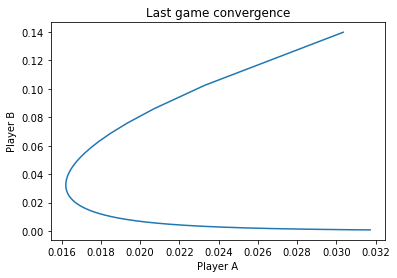

In [34]:
last_conv(last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

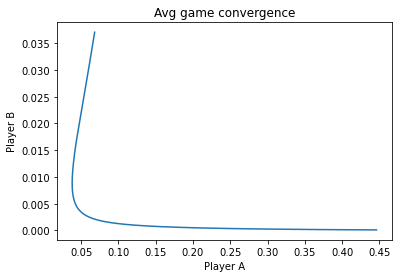

In [35]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

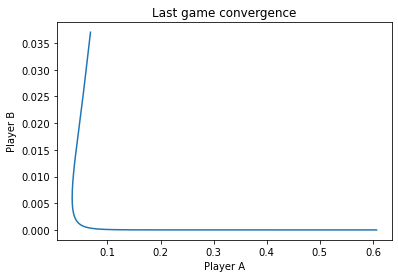

In [36]:
last_conv(last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

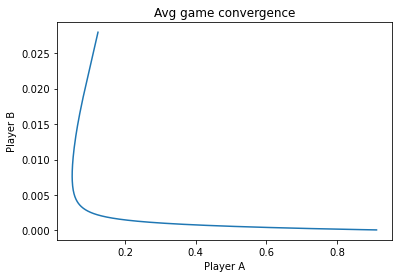

In [37]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

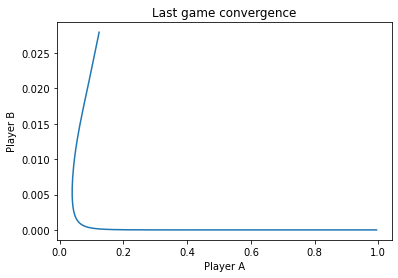

In [38]:
last_conv(last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

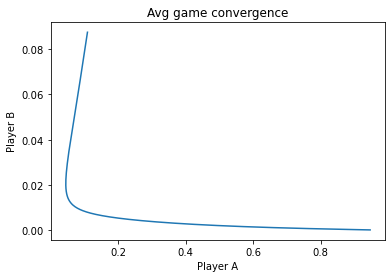

In [43]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
K = 10
c = 30
M_a, M_b = construct_DIR(K, c)
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

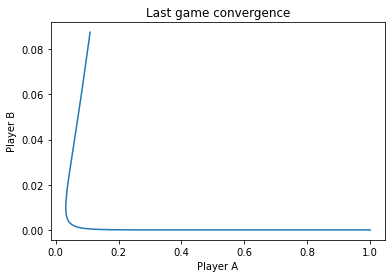

In [44]:
last_conv(last_conv_a, last_conv_b)

### Task II: Uncoupled No-Regret Learning Dynamics under Bandit Information

In [39]:
import random

In [43]:
# An example template of the Multiplicative Weight Update Algorithm. 
# You DO NOT have to use this template

# ------- EXP3 Algorithm -------#
def EXP3(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (not using dict here :-D ):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 
    
    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):
        # Compute epsilon
        epsilon = compute_epsilon(t)
        
        # ---------- Fill out the details --------------# 
        
        #sum of weights
        sum_w_a = np.sum(w_a)
        sum_w_b = np.sum(w_b)

        #probability
        p_a = w_a/sum_w_a #normalizing
        p_b = w_b/sum_w_b

        #adding probabilities
        sum_p_a += p_a[0]
        sum_p_b += p_b[0]
        
        # cost vector
        cost_a = np.matmul(M_a, p_b)
        cost_b = np.matmul(M_b.T, p_a)
        
        # making random choice based on probabilities
        choice_list = list(range(0,k))
        random_choice_a = random.choices(choice_list, p_a, k=1)
        random_choice_b = random.choices(choice_list, p_b, k=1)
        
        # creating c bar based on random choice
        cost_a_bar = np.zeros(k)
        cost_b_bar = np.zeros(k)
        cost_a_bar[random_choice_a] = cost_a[random_choice_a]/p_a[random_choice_a]
        cost_b_bar[random_choice_b] = cost_b[random_choice_b]/p_b[random_choice_b]

        #updating weights
        w_a = np.multiply(w_a, np.exp(-1*epsilon*cost_a_bar))
        w_b = np.multiply(w_b, np.exp(-1*epsilon*cost_b_bar))
        
        # avg convergence
        avg_conv_a[t] = sum_p_a/(t+1)
        avg_conv_b[t] = sum_p_b/(t+1)

        # last convergence
        last_conv_a[t] = p_a[0]
        last_conv_b[t] = p_b[0]
    
    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

#### Question (a) - Pennies game

In [44]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

**Choice 1: epsilon = 1/2**

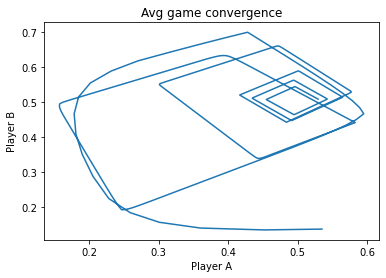

In [45]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

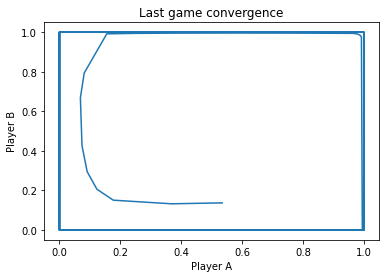

In [46]:
last_conv(last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

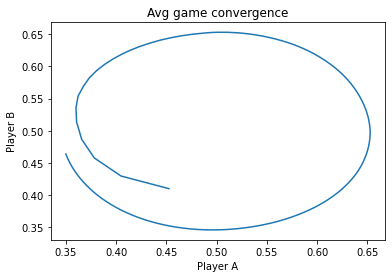

In [47]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

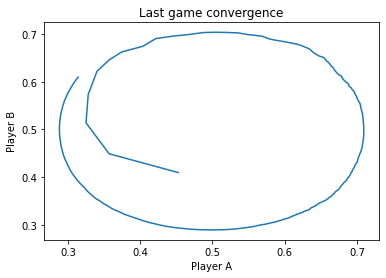

In [48]:
last_conv(last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

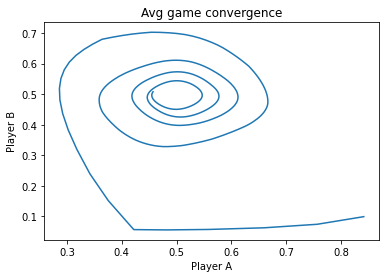

In [49]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

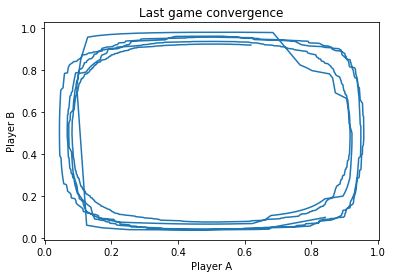

In [50]:
last_conv(last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

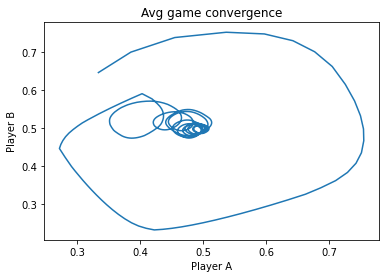

In [51]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

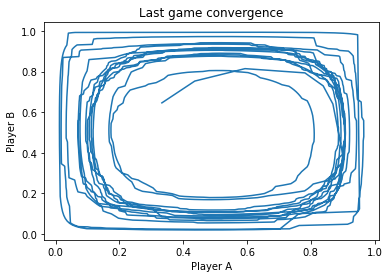

In [52]:
last_conv(last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

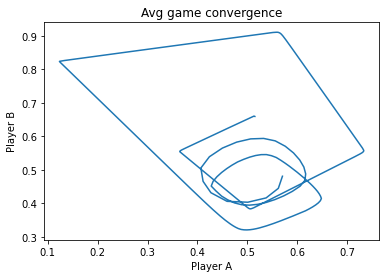

In [53]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

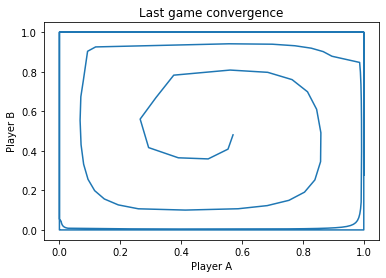

In [54]:
last_conv(last_conv_a, last_conv_b)

#### Question (b) - Rock-paper-scissors game

In [55]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

/var/folders/vq/zpn0t5p145b17mbw4wgpvjnw0000gn/T/ipykernel_31004/25657498.py:73: RuntimeWarning: overflow encountered in exp
  w_b = np.multiply(w_b, np.exp(-1*epsilon*cost_b_bar))
/var/folders/vq/zpn0t5p145b17mbw4wgpvjnw0000gn/T/ipykernel_31004/25657498.py:50: RuntimeWarning: invalid value encountered in true_divide
  p_b = w_b/sum_w_b


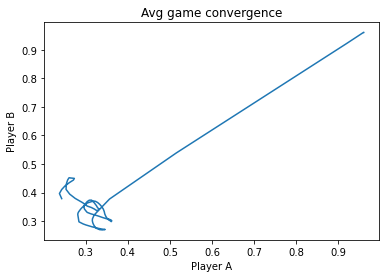

In [56]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

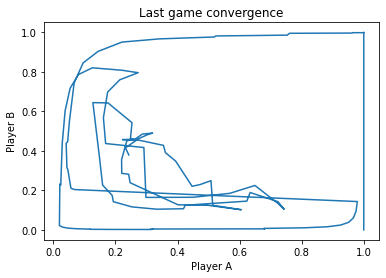

In [57]:
last_conv(last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

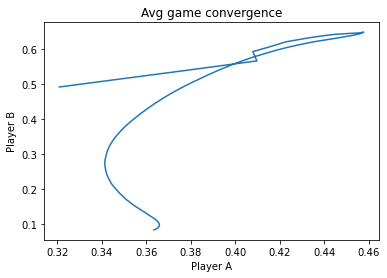

In [58]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

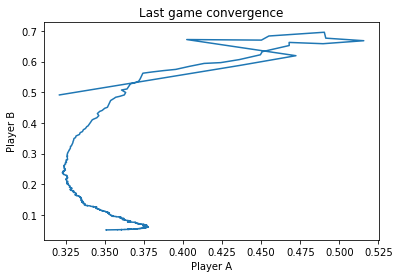

In [59]:
last_conv(last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

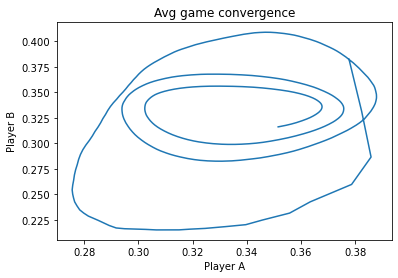

In [60]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

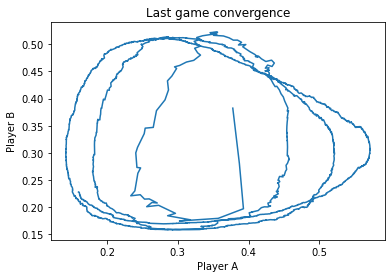

In [61]:
last_conv(last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

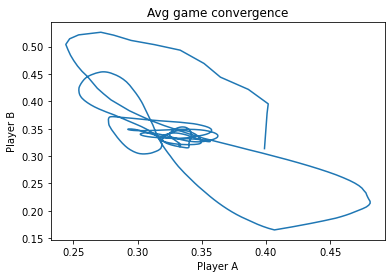

In [62]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

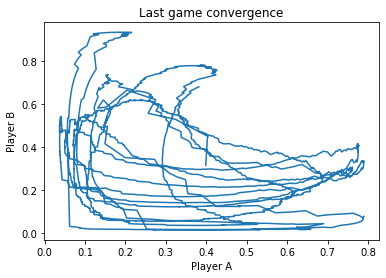

In [63]:
last_conv(last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

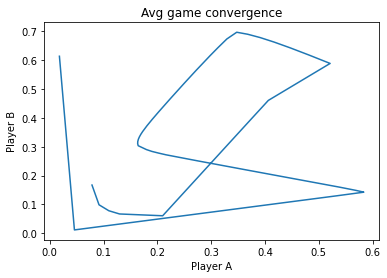

In [64]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = EXP3(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

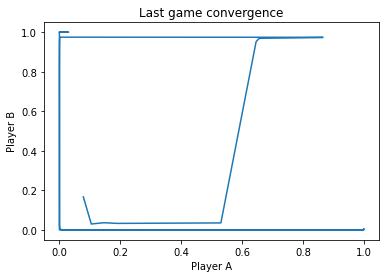

In [65]:
last_conv(last_conv_a, last_conv_b)